<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/WISDM/wisdm_lstm_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/WISDM_ar_v1.1_raw.txt', header=None, on_bad_lines='skip').dropna()

In [3]:
df

,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...,...
1086461,19,Sitting,131623331483000,9.000000,-1.570000,1.69;
1086462,19,Sitting,131623371431000,9.040000,-1.460000,1.73;
1086463,19,Sitting,131623411592000,9.080000,-1.380000,1.69;
1086464,19,Sitting,131623491487000,9.000000,-1.460000,1.73;


In [4]:
#컬럼 정리하기
df.columns = ['user', 'activity', 'timestamp', 'x', 'y', 'z']
df['z'] = df['z'].str.replace(';', '')
df=df.drop(columns=['timestamp']) #timestamp 열은 분석에 불필요하므로 제거한다.
df.head()

,user,activity,x,y,z
0,33,Jogging,-0.694638,12.680544,0.50395286
1,33,Jogging,5.012288,11.264028,0.95342433
2,33,Jogging,4.903325,10.882658,-0.08172209
3,33,Jogging,-0.612916,18.496431,3.0237172
4,33,Jogging,-1.184970,12.108489,7.205164


In [5]:
#문자열로 된 숫자들은 실수로 바꿔주기
df['x']=df['x'].astype(float)
df['y']=df['y'].astype(float)
df['z']=df['z'].astype(float)

In [6]:
df.isnull().sum() #결측치 확인

,0
user,0
activity,0
x,0
y,0
z,0


In [7]:
#라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['activity']=label.fit_transform(df['activity'])
df

,user,activity,x,y,z
0,33,1,-0.694638,12.680544,0.503953
1,33,1,5.012288,11.264028,0.953424
2,33,1,4.903325,10.882658,-0.081722
3,33,1,-0.612916,18.496431,3.023717
4,33,1,-1.184970,12.108489,7.205164
...,...,...,...,...,...
1086461,19,2,9.000000,-1.570000,1.690000
1086462,19,2,9.040000,-1.460000,1.730000
1086463,19,2,9.080000,-1.380000,1.690000
1086464,19,2,9.000000,-1.460000,1.730000


WISDM처럼 사람별 데이터가 있는 경우에는 사람을 기준으로 훈련데이터와 테스트 데이터를 나누는 것이 중요하다.
그렇지 않으면 테스트셋에 있는 행동 패턴이 이미 훈련셋에 존재해서 모델이 오버피팅될 가능성이 있다.

In [8]:
users = sorted(df['user'].unique())
print(users)  # 분포 먼저 확인


[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36)]


In [9]:
#train, test 분리
users = sorted(df['user'].unique())
print(users)

train_users = [u for u in users if u <= 28]
val_users  = [u for u in users if u > 28 and u<=32]
test_users=[u for u in users if u>32]

#사용자 그룹에 따라 DataFrame 생성
train_df = df[df['user'].isin(train_users)].copy()
test_df  = df[df['user'].isin(test_users)].copy()
val_df=df[df['user'].isin(val_users)].copy()

print("-----사용자 기반 데이터 분할-----")
print(f"훈련용 사용자 수: {len(train_users)}명, 데이터 수: {len(train_df)}")
print(f"검증용 사용자 수: {len(val_users)}명, 데이터 수: {len(val_df)}")
print(f"테스트용 사용자 수: {len(test_users)}명, 데이터 수: {len(test_df)}")

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36)]
-----사용자 기반 데이터 분할-----
훈련용 사용자 수: 28명, 데이터 수: 823043
검증용 사용자 수: 4명, 데이터 수: 143367
테스트용 사용자 수: 4명, 데이터 수: 120055


In [10]:

#데이터 스케일링
from sklearn.preprocessing import StandardScaler

features=['x','y','z']
scaler=StandardScaler()
#스케일링은 무조건 훈련 데이터 기준으로... 테스트 데이터 기준으로 하면=> 데이터 누수!!!!!
scaler.fit(train_df[features])

train_df[features]=scaler.transform(train_df[features])
val_df[features]=scaler.transform(val_df[features])
test_df[features]=scaler.transform(test_df[features])


In [11]:
#시계열 데이터를 딥러닝 모델이 학습할 수 있는 형태로 가공하는 슬라이딩 윈도우 함수.
#오버랩핑: 데이터 조각(세그먼트)을 만들 때 윈도우를 겹쳐서 데이터를 잘라내는 기법
#step값이 time_steps값보다 작을 때 오버램핑이 발생한다.=> 더 많은 훈련 데이터 확보, 행동의 전환점 포착
import numpy as np
from scipy.stats import mode
def segments(df, time_steps, step, label_name):
    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['x'].values[i:i+time_steps]
        ys = df['y'].values[i:i+time_steps]
        zs = df['z'].values[i:i+time_steps]

        win_labels = df[label_name].values[i:i+time_steps].astype(int)
        label = np.bincount(win_labels).argmax()
        segments.append([xs, ys, zs])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

In [12]:
TIME_PERIOD = 80
STEP_DISTANCE = 40
LABEL = 'activity'

#훈련 데이터셋
x_train, y_train=segments(train_df, TIME_PERIOD, STEP_DISTANCE, LABEL)

#검증 데이터셋
x_val, y_val=segments(val_df, TIME_PERIOD, STEP_DISTANCE, LABEL)

#테스트 데이터셋
x_test, y_test=segments(test_df, TIME_PERIOD, STEP_DISTANCE, LABEL)

#원핫인코딩
from tensorflow.keras.utils import to_categorical

num_classes=label.classes_.size
y_train_hot=to_categorical(y_train, num_classes)
y_val_hot=to_categorical(y_val, num_classes)
y_test_hot=to_categorical(y_test, num_classes)
print("훈련 데이터:", x_train.shape, y_train_hot.shape)
print("검증 데이터:", x_val.shape, y_val_hot.shape)

훈련 데이터: (20575, 80, 3) (20575, 6)
검증 데이터: (3583, 80, 3) (3583, 6)


In [13]:
x_train.shape, y_train.shape, x_train.shape[0]

((20575, 80, 3), (20575,), 20575)

In [14]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [15]:
time_period, sensors = x_train.shape[1], x_train.shape[2]

## LSTM 모델

In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential()

model.add(LSTM(
    128,
    return_sequences=True,
    input_shape=(time_period, sensors),
    kernel_regularizer=l2(0.001)
))
model.add(Dropout(0.5))

model.add(LSTM(
    128,
    kernel_regularizer=l2(0.001)
))
model.add(Dropout(0.5))


model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
optimizer = Adam(learning_rate=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 80, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,454 (783.02 KB)

 Trainable params: 200,198 (782.02 KB)

 Non-trainable params: 256 (1.00 KB)

In [20]:
import tensorflow as tf

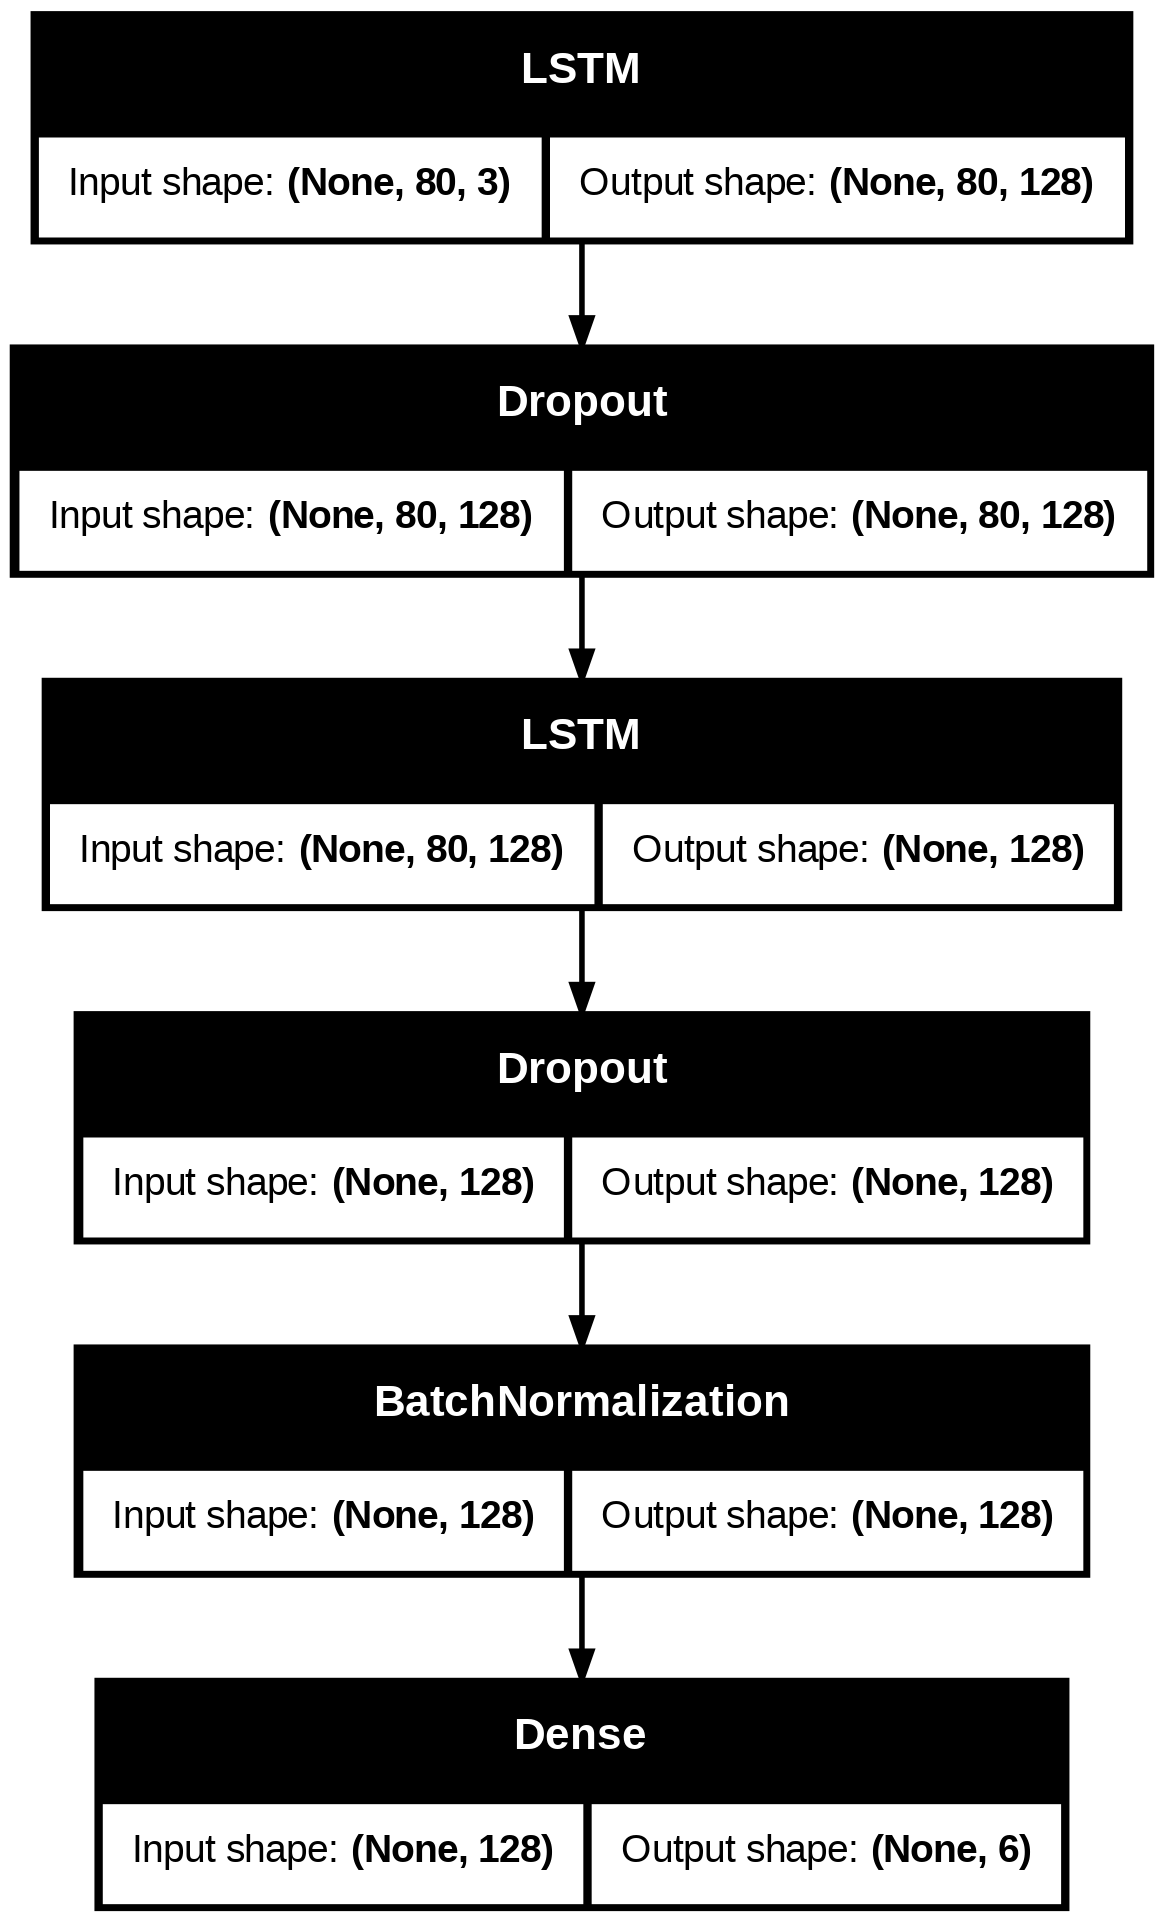

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [23]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)


In [24]:
from sklearn.utils import class_weight
import numpy as np

#원-핫 인코딩 되기 전의 y_train을 사용해 가중치를 계산
#데이터 불균형 해결을 위해서...
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

print("계산된 클래스 가중치:", class_weights_dict)

계산된 클래스 가중치: {0: np.float64(1.8377098963915683), 1: np.float64(0.5336393816785974), 2: np.float64(3.2721055979643765), 3: np.float64(4.111710631494804), 4: np.float64(1.4660823713837823), 5: np.float64(0.4253493756718763)}


In [25]:
history = model.fit(
    x_train,
    y_train_hot,
    batch_size=192,
    epochs=50,
    validation_data=(x_val, y_val_hot),
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.4404 - loss: 1.5540 - val_accuracy: 0.6947 - val_loss: 1.4272 - learning_rate: 0.0010
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7171 - loss: 0.8442 - val_accuracy: 0.6520 - val_loss: 1.0990 - learning_rate: 0.0010
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7456 - loss: 0.7086 - val_accuracy: 0.7469 - val_loss: 0.9754 - learning_rate: 0.0010
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7610 - loss: 0.6554 - val_accuracy: 0.7561 - val_loss: 1.3993 - learning_rate: 0.0010
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7737 - loss: 0.6068 - val_accuracy: 0.7390 - val_loss: 1.5695 - learning_rate: 0.0010
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7814 - loss: 0.6016 - val_accuracy: 0.6785 - val_loss: 1.2013 - learning_rate: 0.0010
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7716 - loss: 0

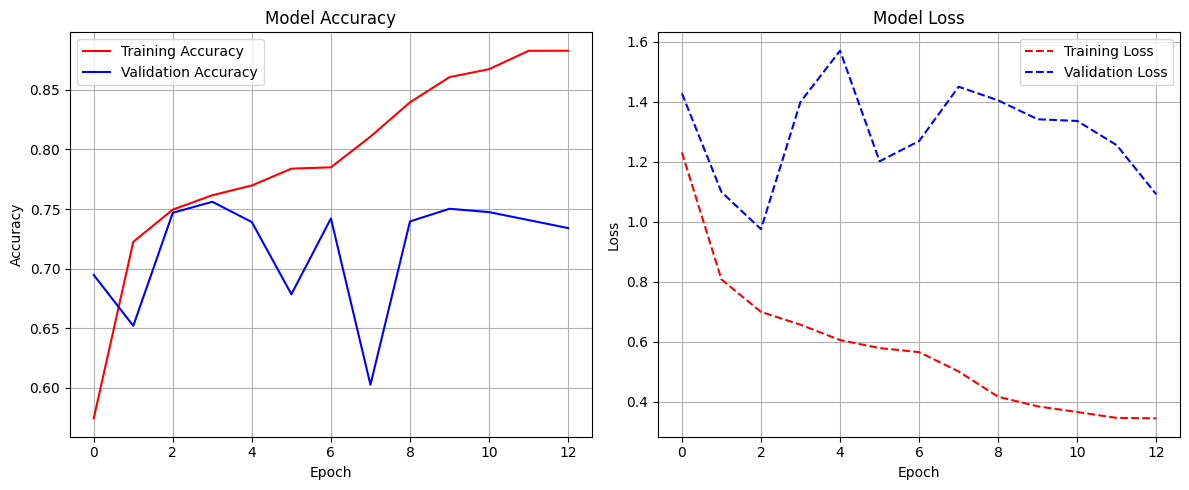

In [26]:
import matplotlib.pyplot as plt

#그래프 전체 크기 설정
plt.figure(figsize=(12, 5))

#--- 첫 번째: 정확도 그래프 ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'r-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- 두 번째: 손실 그래프 ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r--', label='Training Loss')
plt.plot(history.history['val_loss'], 'b--', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 그래프 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
최종 테스트 정확도 (Accuracy): 0.6553
최종 테스트 손실 (Loss): 0.8404

[ 상세 분류 리포트 ]

              precision    recall  f1-score   support

  Downstairs       0.17      0.26      0.21       289
     Jogging       1.00      0.81      0.89      1009
     Sitting       1.00      1.00      1.00       223
    Standing       0.81      0.97      0.88       149
    Upstairs       0.25      0.57      0.35       288
     Walking       0.80      0.52      0.63      1042

    accuracy                           0.66      3000
   macro avg       0.67      0.69      0.66      3000
weighted avg       0.77      0.66      0.69      3000


[ 혼동 행렬 시각화 ]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

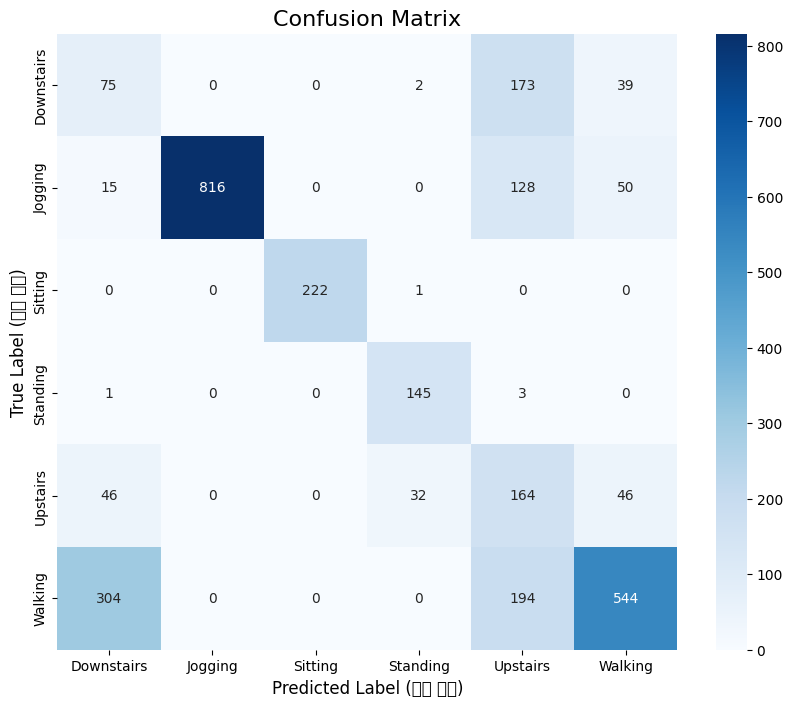

In [27]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 1. 테스트 데이터에 대한 예측 수행
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 2. 전체적인 정확도와 손실 출력
loss, accuracy = model.evaluate(x_test, y_test_hot, verbose=0)
print("="*40)
print(f"최종 테스트 정확도 (Accuracy): {accuracy:.4f}")
print(f"최종 테스트 손실 (Loss): {loss:.4f}")
print("="*40)

# 3. 클래스별 상세 분류 리포트 출력 (어떤 활동을 잘 맞추는지)
print("\n[ 상세 분류 리포트 ]\n")
print(classification_report(y_test, y_pred_classes, target_names=label.classes_))

# 4. 혼동 행렬(Confusion Matrix) 시각화 (어떤 활동을 헷갈리는지)
print("\n[ 혼동 행렬 시각화 ]")
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label.classes_, yticklabels=label.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label (실제 활동)', fontsize=12)
plt.xlabel('Predicted Label (예측 활동)', fontsize=12)
plt.show()

## LSTM+CNN 모델

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.layers import Conv1D, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.regularizers import l2

%matplotlib inline

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_period, sensors), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5)) #드롭아웃(0.4): 각 데이터마다 40%의 뉴런을 랜덤으로 비활성 시켜 과적합 방지

model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.5))
#커널 사이즈: 패턴을 찾아내는 돋보기의 크기. 한 번에 몇 개의 데이터를 볼 것인지...
#작은 커널 사이즈: 신호의 급격한 변화나 노이즈같은 국소적이고 세밀한 특징
#큰 커널 사이즈: 조금 더 긴 호흡의 패턴, 전체적인 신호모양 같은 특징

model.add(GlobalAveragePooling1D())
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 80, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 78, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 39, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 39, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,150 (461.52 KB)

 Trainable params: 117,894 (460.52 KB)

 Non-trainable params: 256 (1.00 KB)

None


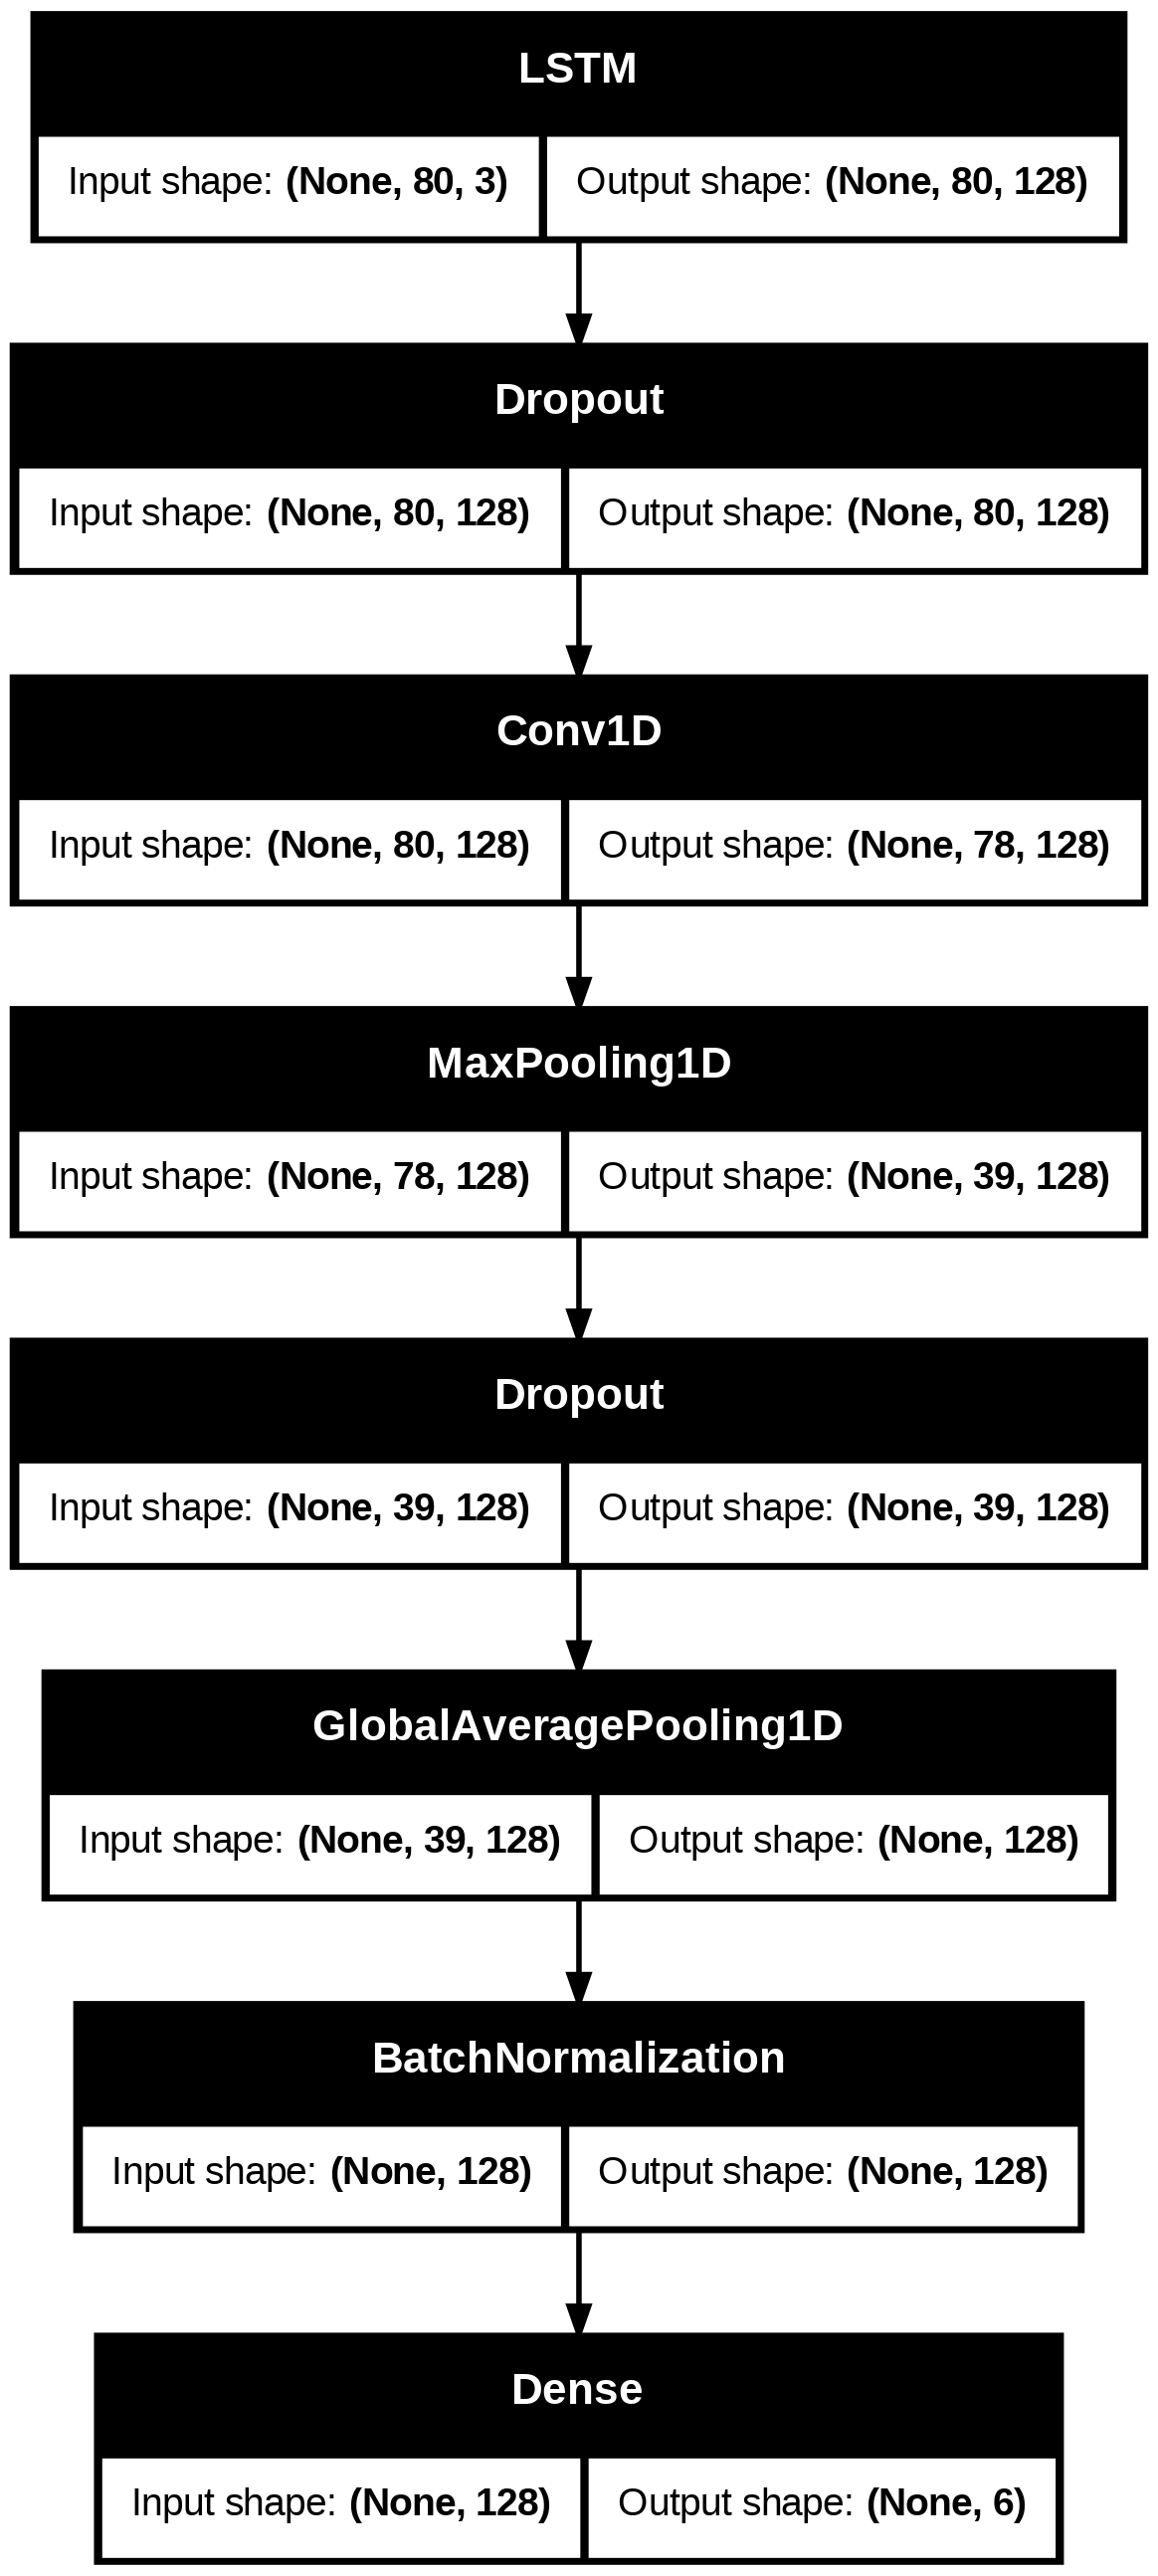

In [34]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [29]:
from sklearn.utils import class_weight
import numpy as np

# 원-핫 인코딩 되기 전의 y_train을 사용해 가중치를 계산
#데이터 불균형 해결을 위해서...
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

print("계산된 클래스 가중치:", class_weights_dict)

계산된 클래스 가중치: {0: np.float64(1.8377098963915683), 1: np.float64(0.5336393816785974), 2: np.float64(3.2721055979643765), 3: np.float64(4.111710631494804), 4: np.float64(1.4660823713837823), 5: np.float64(0.4253493756718763)}


In [30]:
from keras.optimizers import Adam

# Adam 옵티마이저의 학습률을 0.0005로 설정
optimizer = Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
early_stop=EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    min_delta=0.0,
    restore_best_weights=True,
    verbose=1
)
history = model.fit(x_train,
                    y_train_hot,
                    batch_size= 192,
                    epochs=50,
                    callbacks=[early_stop],
                    validation_data=(x_val, y_val_hot),
                    class_weight=class_weights_dict,
                    verbose=1
                   )

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.4383 - loss: 1.3854 - val_accuracy: 0.5825 - val_loss: 1.6158
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6413 - loss: 0.9149 - val_accuracy: 0.5766 - val_loss: 1.4211
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7043 - loss: 0.7663 - val_accuracy: 0.4708 - val_loss: 1.2271
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7285 - loss: 0.7233 - val_accuracy: 0.5481 - val_loss: 1.2538
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7552 - loss: 0.6521 - val_accuracy: 0.6160 - val_loss: 1.1556
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7726 - loss: 0.6049 - val_accuracy: 0.6062 - val_loss: 0.9737
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7906 - loss: 0.5599 - val_accuracy: 0.5456 - val_loss: 1.1661
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8025 - loss: 0.5252 - val_accu

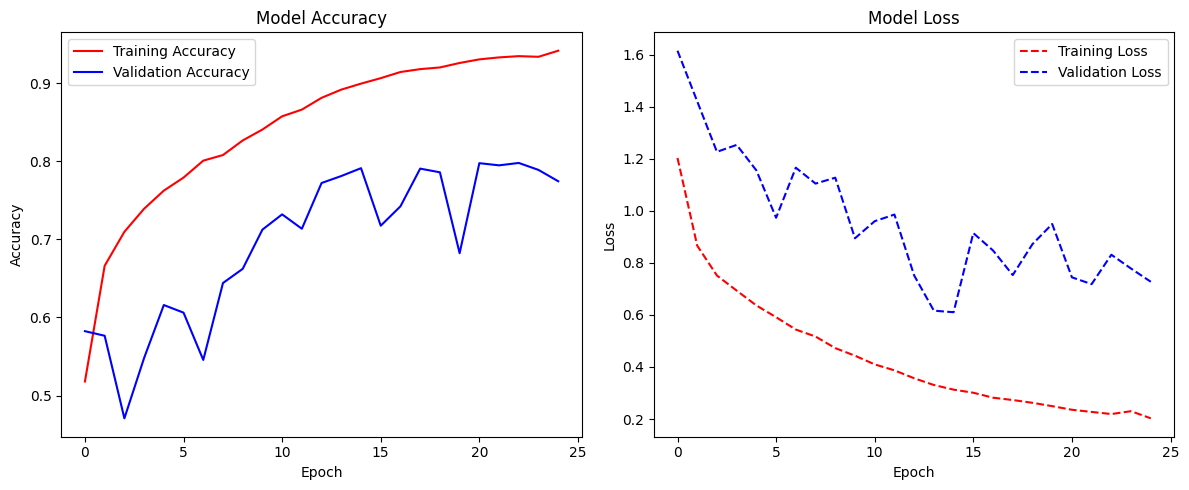

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

#정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'r-', label='Training Accuracy') #훈련 정확도
plt.plot(history.history['val_accuracy'], 'b-', label='Validation Accuracy') #검증 정확도
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#손실
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r--', label='Training Loss') #훈련 손실
plt.plot(history.history['val_loss'], 'b--', label='Validation Loss') #검증 손실
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout() # 그래프 간격 자동 조절
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


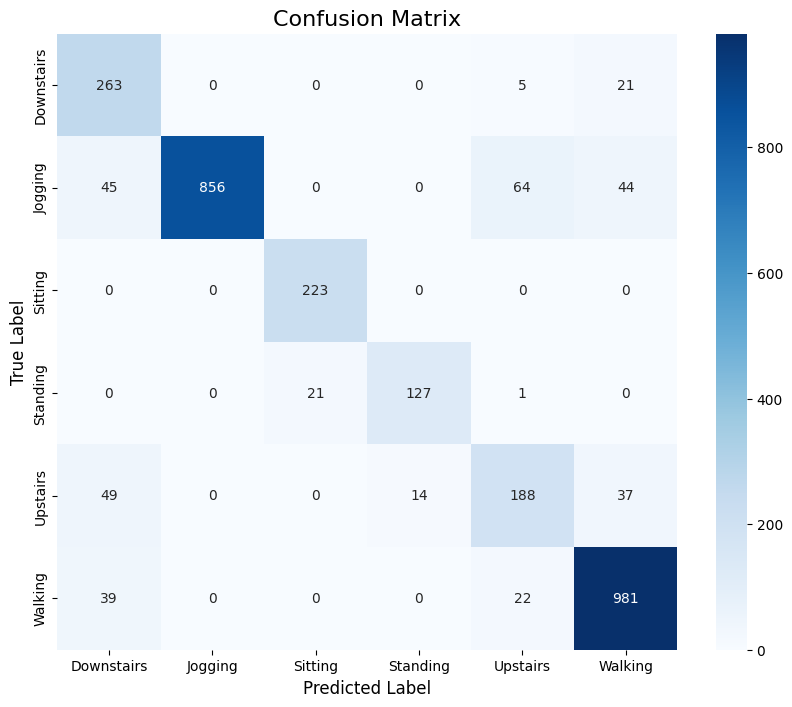

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

#혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

#시각화
plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label.classes_, yticklabels=label.classes_)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [33]:
loss, accuracy = model.evaluate(x_test, y_test_hot, verbose=0)
print("="*30)
print(f"테스트 데이터 정확도 (Accuracy): {accuracy:.4f}")
print(f"테스트 데이터 손실 (Loss): {loss:.4f}")
print("="*30)

테스트 데이터 정확도 (Accuracy): 0.8793
테스트 데이터 손실 (Loss): 0.5638
